# **Procesamiento de Datos a Gran Escala**

## Computación cuántica

*Autores: Pablo López Perez y Daniel Beteta Francisco*

# **0. Librerías utilizadas**

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 5.2 MB/s 
     |████████████████████████████████| 19.2 MB 1.3 MB/s 
     |████████████████████████████████| 240 kB 55.7 MB/s 
     |████████████████████████████████| 55 kB 1.6 MB/s 
     |████████████████████████████████| 106 kB 63.1 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 943 kB 10.0 MB/s 
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 37.5 MB 1.5 MB/s 
     |████████████████████████████████| 4.1 MB 30.8 MB/s 
     |████████████████████████████████| 1.9 MB 52.2 MB/s 
     |████████████████████████████████| 112 kB 48.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.2-py3-none-any.whl size=12224 sha256=064a8068c86ee56b6c536db159e49ae2a5e0e9c0be2c1f320b50f4ddace839bc
  Stored in directory: /root/.cache/pip/wheels/30/dc/90/0ee55

In [ ]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.0 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=04061bb09d54534c0c497b311dfaff411c6f28c3c380fcbd3b64967d6353ab50
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [ ]:
import pylatexenc

import numpy as np
import matplotlib.pyplot as plt

from typing import Dict
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from qiskit import QuantumCircuit, QuantumRegister, Aer, IBMQ, execute, assemble, ClassicalRegister, transpile

# **1. Puertas Cuánticas**

In [ ]:
provider = IBMQ.enable_account("8ed25f06868c726befcbb1e44d082f33155cc03ecb0ce075aefdd917d06bbcfe7adc24cae038290ec9bc13b6e7275c43375c55b1c9b2b65c39faf539dcfc2fae")
ibmq_qasm_simulator = provider.get_backend('ibmq_qasm_simulator')
SHOTS = 20000 

## **Puertas de 1 qbit**

### **Puerta de Hadamard**

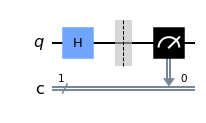

In [ ]:
quantum_circuit = QuantumCircuit(1, 1)
quantum_circuit.h(0)
quantum_circuit.barrier()
quantum_circuit.measure([0], [0])
quantum_circuit.draw('mpl')

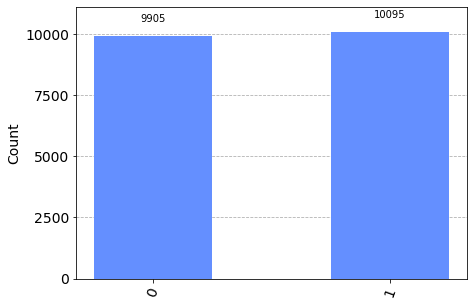

In [ ]:
result = execute(quantum_circuit, ibmq_qasm_simulator, shots=SHOTS).result()
appearence_dict = result.get_counts(quantum_circuit)
plot_histogram(appearence_dict)

Se comprueba por tanto que supone una superposición exacta de $|0>$ y $|1>$ ya que $|\frac{-1}{\sqrt2}|^2$ = $|\frac{1}{\sqrt2}|^2$ = $\frac{1}{2}$.

### **Puerta NOT**

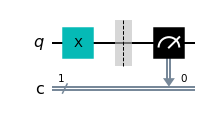

In [ ]:
quantum_circuit = QuantumCircuit(1, 1)
quantum_circuit.x(0)
quantum_circuit.barrier()
quantum_circuit.measure([0], [0])
quantum_circuit.draw('mpl')

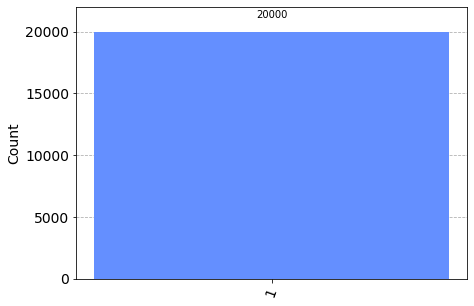

In [ ]:
result = execute(quantum_circuit, ibmq_qasm_simulator, shots=SHOTS).result()
appearence_dict = result.get_counts(quantum_circuit)
plot_histogram(appearence_dict)

Se comprueba por tanto el funcionamiento de la puerta NOT, ya que por defecto el bit de entrada vale 0 y tras aplicar la puerta todos los valores resultantes son 1.

## **Puertas de 2 qbit**

### **Puerta CNOT**

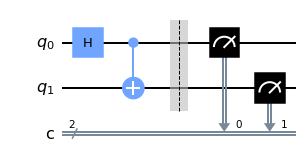

In [ ]:
quantum_circuit = QuantumCircuit(2, 2)
quantum_circuit.h(0)  
quantum_circuit.cx(0, 1)
quantum_circuit.barrier()
quantum_circuit.measure([0, 1], [0, 1])
quantum_circuit.draw('mpl')

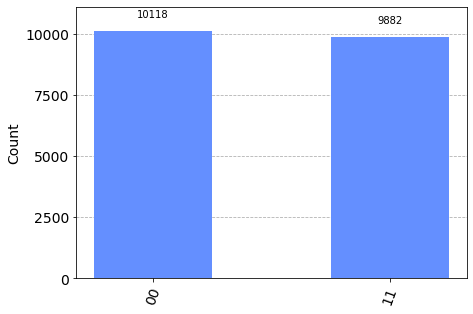

In [ ]:
result = execute(quantum_circuit, ibmq_qasm_simulator, shots=SHOTS).result()
appearence_dict = result.get_counts(quantum_circuit)
plot_histogram(appearence_dict)

La puerta de Controled NOT funciona de forma que si el qbit0 es un 1 se cambia el valor del qbit1, es por ello que al combinar dicha puerta con una de Hadamard en el qbit0 hace que los únicos outputs posibles sean el 00 y el 11, ya que como hemos comentado anteriormente el valor por defecto de entrada es 0.

# **2. Generación de números aleatorios con un Computador Cuántico**

**Se pide que utilizando las puertas Hadamard que sean necesarias, se implemente un generador de números aleatorios de 6bit, comprobando que los números sean realmente aleatorios.**

De tal forma, se utilizan dichos 6 qbits en superposición y se realizan las mediciones de cada qbit, de manera que cada uno de ello sea a 0 o 1 con la misma probabilidad. Por tanto, y para comprobar la aletoriedad, representamos un histograma tras realizar $20000$ ejecuciones (máximo permitido para el backend utilizado), en el que se espera que los $2^6 = 64$ posibles valores aparezan unas $20000/64 = 312$ veces.

In [ ]:
AMOUNT_OF_QBITS = 6
DIFFERENT_VALUES = 2 ** AMOUNT_OF_QBITS
APPEARENCE_EXPECTED = int(SHOTS / DIFFERENT_VALUES)

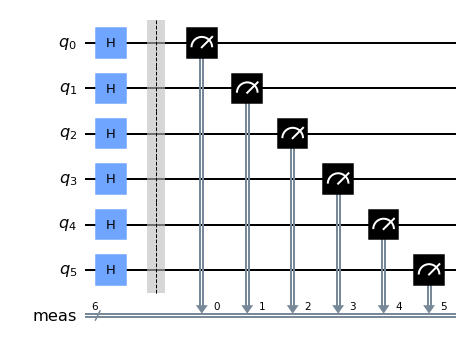

In [ ]:
quantum_circuit = QuantumCircuit(AMOUNT_OF_QBITS)
quantum_circuit.h(QuantumRegister(AMOUNT_OF_QBITS, 'q'))
quantum_circuit.measure_all()
quantum_circuit.draw('mpl')

In [ ]:
job = execute(quantum_circuit, ibmq_qasm_simulator, shots=SHOTS)
result = job.result()
appearence_dict = result.get_counts(quantum_circuit)

Text(0, 0.5, 'Appearence Values')

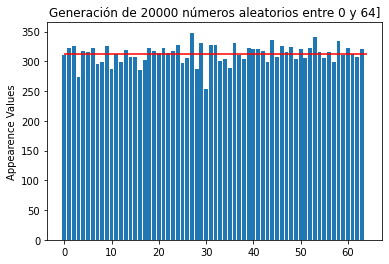

In [ ]:
appearence_values = appearence_dict.values()
appearence_range = range(len(appearence_values))
plt.bar(appearence_range, appearence_values)
plt.hlines(APPEARENCE_EXPECTED, 0, DIFFERENT_VALUES, color='red')
plt.title("Generación de {} números aleatorios entre 0 y {}]".format(SHOTS, DIFFERENT_VALUES))
plt.ylabel("Appearence Range")
plt.ylabel("Appearence Values")

Como se puede observar la mayoría de valores están entorno a su frecuencia esperada, si pudieramos aumentar más los intentos (shots), se acabarían estabilizando todavía más.

# **3. Entrelazamiento**

**Se pide comprobar el comportamiento del siguiente circuito:**

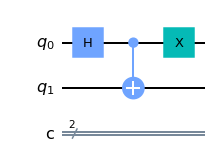

In [ ]:
quantum_circuit = QuantumCircuit(2, 2)
quantum_circuit.h(0)
quantum_circuit.cx(0, 1)
quantum_circuit.x(0)
quantum_circuit.draw(output='mpl')

**Y explicar porque el resultado es una función de onda entrelazada.**

En primer lugar, definiendo que se entiende por función de onda entrelazada, se tiene que esta es la que toma el valor $|01>$ con probabilidad $\frac{1}{2}$
y el valor $|10>$ con probabilidad $\frac{1}{2}$, mientras que tiene una probabilidad de $0$ para el resto de eventos posibles. 

Por tanto, en este tipo de funciones, sabiendo el valor del primer qbit se puede conocer el del segundo.

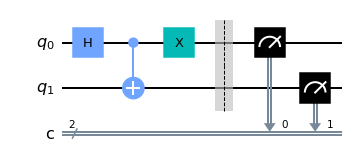

In [ ]:
quantum_circuit.barrier()
quantum_circuit.measure([0,1], [0,1])
quantum_circuit.draw(output='mpl')

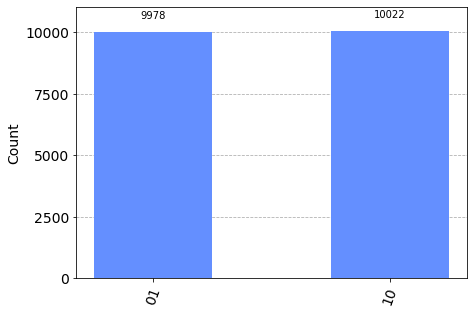

In [ ]:
result = execute(quantum_circuit, ibmq_qasm_simulator, shots=SHOTS).result()
appearence_dict = result.get_counts(quantum_circuit)
plot_histogram(appearence_dict)

Como se puede observar en el histograma, solo aparecen los nombrados estados y además ocurren con una probabilidad $≈ 50$%, luego se comprueba que es una función de onda entrelazada.

# **4. Sumador de 2 qbits**

**Se pide realizar el circuito cuántico que sea equivalente a un sumador de dos
bits.**

In [ ]:
def build_quantum_circuit(first_digit: int, second_digit: int) -> QuantumCircuit:
    quantum_circuit = QuantumCircuit(4, 2)
    
    # Fase 1
    if first_digit == 1:
        quantum_circuit.x(0)
    if second_digit == 1:
        quantum_circuit.x(1)
    quantum_circuit.barrier()
    
    # Fase 2
    # Crea la puerta XOR en el qbit 2
    quantum_circuit.cx(0, 2)
    quantum_circuit.cx(1, 2)
    # Crea la puerta AND en el qbit 3
    quantum_circuit.ccx(0, 1, 3)
    quantum_circuit.barrier()

    # Fase 3
    quantum_circuit.measure(2, 0) 
    quantum_circuit.measure(3, 1) 
    return quantum_circuit 

def get_two_qbits_sum_output(quantum_circuit: QuantumCircuit) -> Dict[int, float]:
    quantum_circuit_assembled = assemble(quantum_circuit)
    appearence_dict = ibmq_qasm_simulator.run(quantum_circuit_assembled).result().get_counts()
    return appearence_dict

Debido a que el sumador es de 2 bits hay un total de $2^2 = 4$ posibilidades, de tal forma tenemos:

## **Caso 1:** 0 + 0 = 00

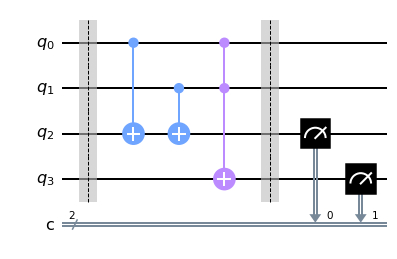

In [ ]:
quantum_circuit = build_quantum_circuit(0, 0)
quantum_circuit.draw(output='mpl')

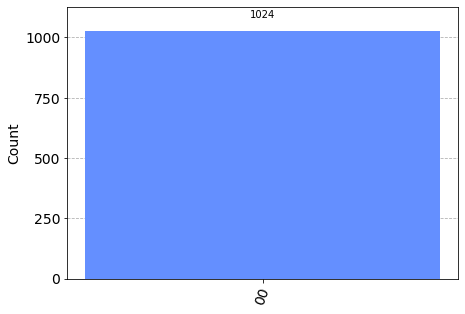

In [ ]:
appearence_dict = get_two_qbits_sum_output(quantum_circuit)
plot_histogram(appearence_dict)

## **Caso 2:** 0 + 1 = 01

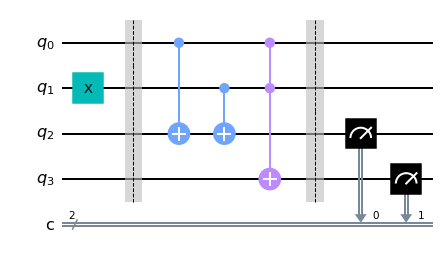

In [ ]:
quantum_circuit = build_quantum_circuit(0, 1)
quantum_circuit.draw(output='mpl')

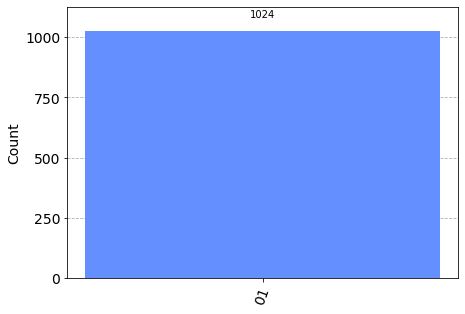

In [ ]:
appearence_dict = get_two_qbits_sum_output(quantum_circuit)
plot_histogram(appearence_dict)

## **Caso 3:** 1 + 0 = 01

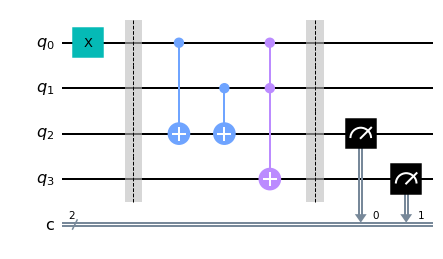

In [ ]:
quantum_circuit = build_quantum_circuit(1, 0)
quantum_circuit.draw(output='mpl')

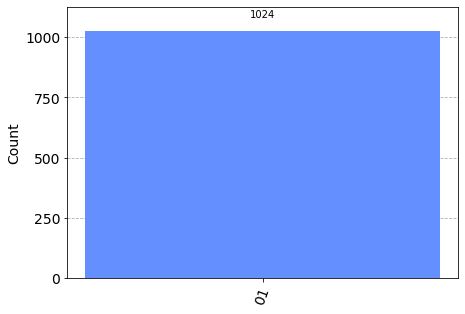

In [ ]:
appearence_dict = get_two_qbits_sum_output(quantum_circuit)
plot_histogram(appearence_dict)

## **Caso 4:** 1 + 1 = 10

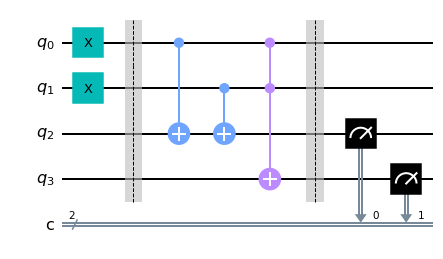

In [ ]:
quantum_circuit = build_quantum_circuit(1, 1)
quantum_circuit.draw(output='mpl')

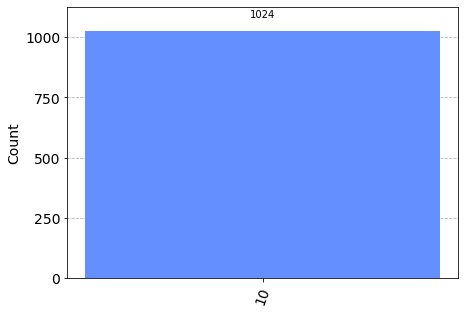

In [ ]:
appearence_dict = get_two_qbits_sum_output(quantum_circuit)
plot_histogram(appearence_dict)

Como se ha podido observar el comportamiento es el esperado para los 4 casos. Así, el funcionamiento puede dividirse en 3 fases divididas por las 2 barreras:
- Fase 1: Los qbits 0 y 1 son los parámetros de entrada, los cuales, por defecto son 0, es por ello, que es necesario incluir una puerta NOT en el caso de que queramos tener como entrada un 1.
- Fase 2: Se crea por un lado una puerta XOR para el output del primer bit, de forma que solo devolverá un 1 para combinaciones de entrada diferentes (0 y 1 o 1 y 0). Y por otro lado se crea una puerta AND para el output del segundo bit, ya que esta solo devolverá 1 en caso de que la entrada sea 1 y 1.
- Fase 3: Se lee la salida del algoritmo central en los qbits 2 y 3.